### Lorenz 96 model
https://en.wikipedia.org/wiki/Lorenz_96_model
- 지구의 특정 위도를 따라 배열된 여러 지점의 대기 상태(온도, 기압)가 시간이 지남에 따라 어떻게 변하는지 흉내 낸 toy model
- j : 위치
- x(j, t) : 시간 t일 때 j에서의 어떤 기상 값 (ex. 온도)
- F : 외부에서 받는 에너지 (ex. 태양 복사 에너지)
- x(j-1,t)[x(j+1,t) - x(j-2,t)] : advection(대기의 이동), 서쪽(j-1)에서 불어온 바람이 다른 지역(j+1, j-2)의 공기를 옮겨와 현재 위치(j)의 날씨를 바꾸는 복잡한 상호작용을 나타냄.
-  - x(j,t) : dissipation (에너지가 서서히 사라지는 현상)
- F (외부 강제력)

### Julia의 for loops 수치 계산
비선형 커플링 ODE : dx(j,t)/dt = x(j-1,t)[x(j+1,t) - x(j-2,t)] - x(j,t) + F 
- 좌변 ODE : j변째 변수 X가 시간에 따라 어떻게 변하는가?
- Coupled(여러 개의 방정식이 서로에게 영향을 주고 받으며 묶여 있음.) : 좌변의 식을 구하기 위해서 자기 자신인 (j,t)뿐 아니라 이웃 변수들의 값이 필요하다는 뜻

In [1]:
# import Pkg; Pkg.add("DifferentialEquations")

In [2]:
# import Pkg; Pkg.add("Plots")

In [7]:
using DifferentialEquations, Plots, LinearAlgebra, Statistics, Random

In [8]:
# 1. Lorenz 96 Model; 시간 미분 계산
# du[j] = (u[j+1] - u[j-2]) * u[j-1] - u[j] + F를 구현한다.
# mod1을 사용하는 이유는 periodic boundary 때문이다.

function lorenz96!(du, u, p, t)
    F = p # p는 모델의 동작을 결정하는 외부 상수 값 전달 역할
    N = length(u) # 시스템의 변수가 몇 개인가, u는 특정 시간 t에서의 system state variable vector에 해당.
    for j in 1:N # mod1(a, n): a를 n으로 나눈 나머지를 1부터 n 사이의 값으로 반환
        du[j] = (u[mod1(j+1, N)] - u[mod1(j-2, N)]) * u[mod1(j-1, N)] - u[j] + F
    end
end

lorenz96! (generic function with 1 method)

In [14]:
# test!
u0 = randn(40) # 표준 정규 분포를 따르는 무작위 숫자 40개 -> 벡터(배열)
t_span = (0.0, 100.0) # time_span
prob = ODEProblem(lorenz96!, u0, t_span, 8.0) # p=8.0 : F
sol = solve(prob, Tsit5()) # Solving the Equation,
# Tsit5() : Runge-Kutta type algorithm, sol은 sol.t와 sol.u를 모두 저장함.

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1289-element Vector{Float64}:
   0.0
   0.010549001599415039
   0.04573896804704759
   0.09964177497360466
   0.16384005724714257
   0.252788812293191
   0.3555251617234133
   0.4764223412994545
   0.6110032125015599
   0.7303848578535516
   0.8586785558807148
   0.9686168343486788
   1.0731226599453223
   ⋮
  99.28604679670764
  99.35113289980303
  99.42964565860028
  99.50041433314631
  99.57241586043007
  99.64129776798553
  99.71649161306391
  99.78762585600609
  99.86190735712029
  99.92528486300289
  99.98757883939187
 100.0
u: 1289-element Vector{Vector{Float64}}:
 [2.042288526892393, -1.1718376849477565, -1.4453782566905298, 0.25005471819807107, -0.5605841320304022, 0.8495234418869142, -0.06005975976711261, -1.3752742057748921, -0.6718879705547801, 0.5055375959171146  …  -1.2526242206645473, 0.14341848909566443, 0.3252855413047299, -1.713667293016143, -0.8342601824864925, -0.47021373799191063, 0.91329

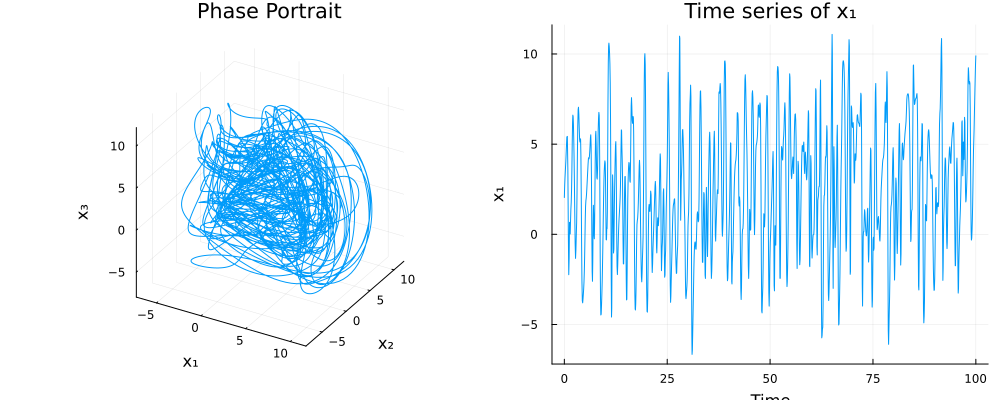

In [15]:
p1 = plot(sol, vars=(1, 2, 3), title = "Phase Portrait",
xlabel = "x₁", ylabel = "x₂", zlabel = "x₃", legend = false)

p2 = plot(sol.t, [sol[i][1] for i in 1:length(sol)],
xlabel = "Time", ylabel= "x₁", title = "Time series of x₁", legend = false)

plot(p1, p2, layout=(1, 2), size = (1000, 400))

In [17]:
# butterfly effect 보다 심층 분석

# 기준이 될 초기 조건 설정
u0₁ = randn(40) 

# 두 번째 초기 조건 설정
preturbation = 1e-8
u0₂ = u0₁ + preturbation * randn(40)

40-element Vector{Float64}:
 -1.2151353268446328
  1.3105907916898583
  0.47110835563965714
 -1.381582107396253
 -0.05867230531687886
 -0.917095275004373
  1.361080106277351
 -0.36290210085223573
 -1.194745651558999
 -0.20058410628901052
 -0.646688307305747
  0.6239292204511164
  0.3776019027597994
  ⋮
 -0.6368293528271322
  0.12515230127523155
 -2.4170294428959282
  0.2773105540455016
  1.4721734880944388
 -0.49561128498031887
 -0.9483968905063188
  1.5504204105813746
 -1.565299147787101
  0.22212947323066243
 -1.2613742934850134
 -0.7793641828583898

In [21]:
tspan₂ = (0.0, 30.0)
p = 8.0

prob1 = ODEProblem(lorenz96!, u0₁, tspan₂, p)
prob2 = ODEProblem(lorenz96!, u0₂, tspan₂, p)

sol1 = solve(prob1, saveat=0.1) # saveat : 0.1 간격 자동 저장(강제)
sol2 = solve(prob2, saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 301-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
 28.9
 29.0
 29.1
 29.2
 29.3
 29.4
 29.5
 29.6
 29.7
 29.8
 29.9
 30.0
u: 301-element Vector{Vector{Float64}}:
 [-1.2151353268446328, 1.3105907916898583, 0.47110835563965714, -1.381582107396253, -0.05867230531687886, -0.917095275004373, 1.361080106277351, -0.36290210085223573, -1.194745651558999, -0.20058410628901052  …  -2.4170294428959282, 0.2773105540455016, 1.4721734880944388, -0.49561128498031887, -0.9483968905063188, 1.5504204105813746, -1.565299147787101, 0.22212947323066243, -1.2613742934850134, -0.7793641828583898]
 [-0.4034468841162368, 1.8595860325455418, 1.1652981540835494, -0.5798962513024039, 0.8267092946092607, 0.03404232922082117, 2.0080392067539385, 0.3856354059199885, -0.32261691307628243, 0.5974632680000537  …  -1.3899766827936537, 0.7800887058957717, 2.177710192357174, 0.13455092307883226, -0.098170030823

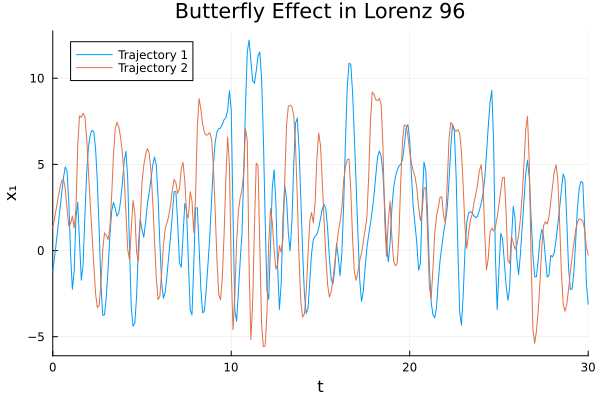

In [22]:
p_timeseries = plot(sol1, vars=1, label = "Trajectory 1", title = "Butterfly Effect in Lorenz 96", xlabel = "Time", ylabel = "x₁"
)

plot!(p_timeseries, sol2, vars = 2, label = "Trajectory 2")

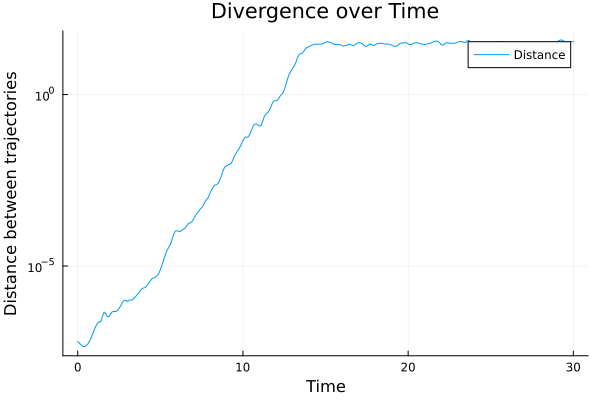

In [23]:
difference = [norm(sol1.u[i] - sol2.u[i]) for i in 1:length(sol1.t)]

p_divergence = plot(sol1.t, difference,
                    xlabel="Time",
                    ylabel="Distance between trajectories",
                    title="Divergence over Time",
                    label="Distance",
                    yscale=:log10)

In [ ]:
# Gaspari-Cohn Localization Function
# 거리에 따라 부드럽게 감소하는 correlation function 구현
# https://doi.org/10.3390/jmse9111156

function gaspari_cohn(d, R) # d: 실제거리, R: length_scale
    abs_d = abs(d)
    
    if abs_d >= R
        return 0.0
    else
        # 0 ≤ |d| ≤ R
        ratio = abs_d / R
        L = (1 - ratio)^2 * (4 + 4*ratio + 3*ratio^2 - 4*ratio^3 + ratio^4)
        return L #상관관계 값(0~1)
    end
end

# make a Localization matrix : 전체 시스템에서 특정 부분의 정보만 증폭하거나 걸러내기 위해 사용하는 수학적 도구 (계산 노이즈 제거, 문제 단순화)
function localization_matrix(N, length_scale)
    loc_matrix = zeros(N, N)
    for i in 1:N
        for j in 1:N
            # 주기적 경계 조건을 고려한 거리
            distance = min(abs(i-j), N-abs(i-j))
            loc_matrix[i, j] = gaspari_cohn(distance, length_scale)
        end
    end
    return loc_matrix
end

localization_matrix (generic function with 1 method)

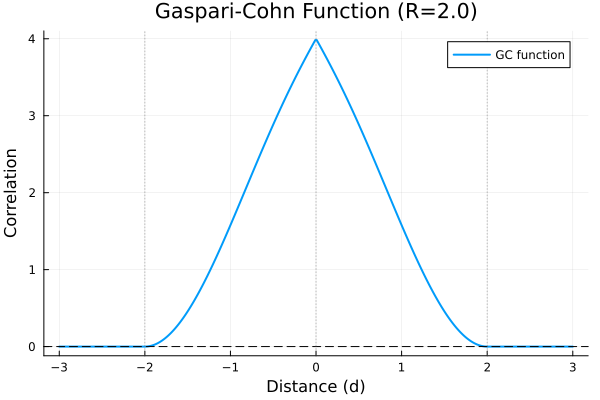

In [32]:
# test!
# 먼저 Gaspari-Cohn 모양이 잘 나왔는지 확인부터.!

R = 2.0  # length scale
d_values = range(-3.0, 3.0, length=350)
gc_values = [gaspari_cohn(d, R) for d in d_values]

p1 = plot(d_values, gc_values, 
         xlabel="Distance (d)", 
         ylabel="Correlation",
         title = "Gaspari-Cohn Function (R=$R)", 
         lw = 2, 
         label = "GC function", 
         legend = :topright)
hline!([0], color = :black, ls=:dash, label="")
vline!([-R, 0, R], color = :gray, ls=:dot, alpha = 0.5, label="")

display(p1)

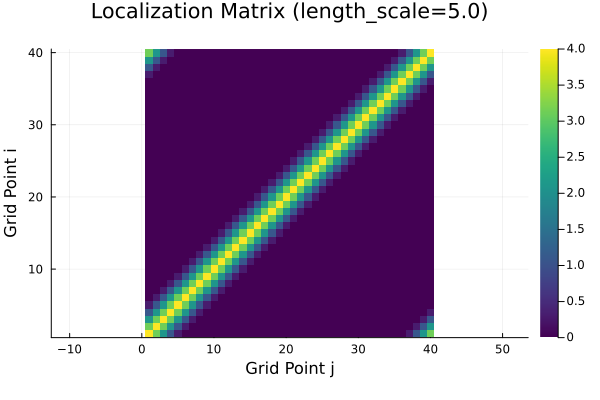

In [34]:
N = 40
length_scale = 5.0

loc_mat = localization_matrix(N, length_scale)

p2 = heatmap(1:N, 1:N, loc_mat,
            xlabel="Grid Point j", 
            ylabel="Grid Point i",
            title="Localization Matrix (length_scale=$length_scale)",
            color=:viridis,
            aspect_ratio=:equal)

display(p2)

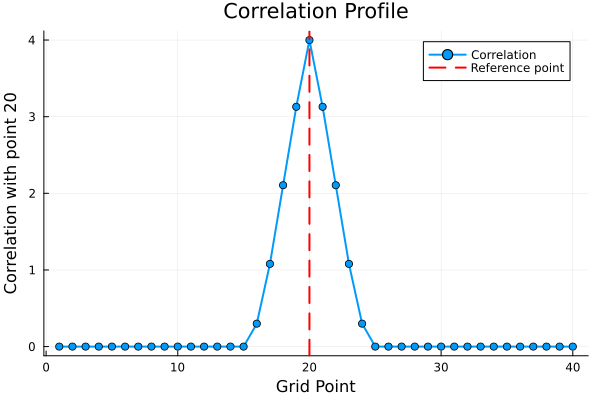

In [35]:
reference_point = 20
correlations = loc_mat[reference_point, :]

p3 = plot(1:N, correlations,
         xlabel="Grid Point",
         ylabel="Correlation with point $reference_point",
         title="Correlation Profile",
         lw=2, marker=:circle, label="Correlation",
         legend=:topright)
vline!([reference_point], color=:red, ls=:dash, lw=2, label="Reference point")

display(p3)

### EnKF implementation
- 상황 : 복잡한 대기 시스템 Lorenz96의 현재 상태를 알고 싶은데, 모델은 불완전(방정식이 현실을 온전히 반영하진 않으니)하고 관측도 불완전(noise)하다. 그렇다면 *EnKF*를 통해 여러 가능한 시나리오를 돌려보고 관측값과 비교해서 가장 그럴듯한 쪽으로 수정하면 되는거 아닌가?

### 왜 이렇게 많은 PARAMETER가 필요할까.

| 파라미터 | 역할 | 예시 |
|---------|------|------|
| `ensemble` | 가능한 시나리오들 (N_state × N_ensemble) | 40×20 행렬 |
| `obs` | 실제 관측값 | 13차원 벡터 |
| `H` | 관측 연산자 (상태→관측) | (13×40) 행렬 |
| `R` | 관측 오차 공분산 | σ²·I |
| `loc_matrix` | Localization 행렬 | Gaspari-Cohn |
| `inflation` | 팽창 계수 | 1.02~1.10 |
| `F` | Lorenz96 강제력 | 8.0 |
| `dt` | 시간 간격 | 0.05 |

### 알고리즘 순서

### 1. Forecast Step (예측)
- 각 ensemble member를 dt 시간만큼 적분
- Lorenz96 모델로 미래 예측
⬇️
### 2. Inflation (팽창)
- ensemble spread를 α배 증폭 (α≈1.05)
- 다양성 유지 → filter divergence 방지
⬇️
### 3. Covariance 계산
- P = (ensemble 편차) × (편차)ᵀ / (N-1)
- Localization: P = P ⊙ loc_matrix
- spurious correlation 제거
⬇️
### 4. Kalman Gain 계산
- K = P·Hᵀ·(H·P·Hᵀ + R)⁻¹
- 모델 vs 관측의 신뢰도 비율
⬇️
### 5. Analysis Step (분석)
- innovation = obs - H·ensemble
- ensemble_new = ensemble + K·innovation
- 각 member마다 perturbed observation 사용
⬇️
**다음 cycle 반복**

In [ ]:
# EnKF Implementation (Forecast and Analysis)
function enkf_cycle!(ensemble, obs, H, R, loc_matrix, inflation, lorenz_params, dt)
    #=
    ensemble : (N_state * N_ensemble) 행렬, 각 열이 하나의 시나리오라 생각하자
    obs : 관측 벡터
    H : 관측 연산자 (상태 -> 관측)
    R : 관측 오차 공분산 행렬
    loc_matrix : Localization 행렬 (to delete spurious correlation)
    inflation : 앙상블 퍼짐 방지
    lorenz_params : Lorenz96모델의 F값
    dt : 예측 시간 간격
    =#
    

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file://c:/Users/dnjst/Documents/GitHub/EnKF-4DVAR_2013_HJS/In[3]#15:5\[90mIn[3]:15:5[0;0m]8;;\
    =#
    [48;2;120;70;70m[0;0m
[90m#   └ ── [0;0m[91mpremature end of input[0;0m